In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [63]:
!pip install imbalanced-learn

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

the data has 1599 rows and 12 columns

In [7]:
#checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

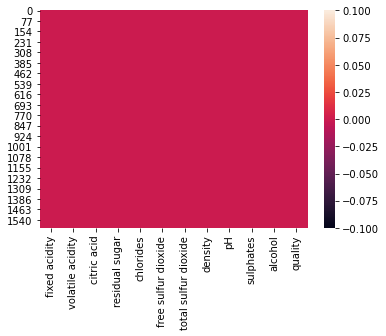

In [8]:
sn.heatmap(df.isnull())

there is no null values in the data set.

In [10]:
#checking unique values in the dependent data set since it is a classification problem
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

The unique function is providing all the unique values in quality attribute of the dataset.

In [11]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

It will provide number of data with respect to each value of attribute.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
#attributes
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


the mean is greater then the median, henece there is some positive skewness in the dataset.

there are noticible difference between 75 percentile and max value, there are outliers in the dataset

# EXPLORATORY DATA ANALYSIS

# univariate analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

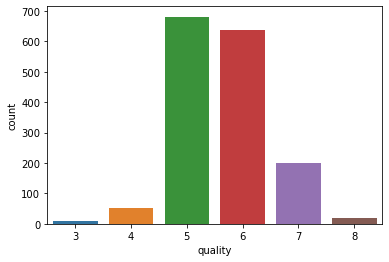

In [15]:
sn.countplot(data=df, x="quality")

In [16]:
#transforming quality variable in rating variblie 
#3,4=1
#5,6=2
#7,8=3
conditions=[
    (df["quality"] >= 7),
    (df["quality"] <= 4)
]
rating=[1,3]
df["rating"]=np.select(conditions,rating,default=2)
df.rating.value_counts()

2    1319
1     217
3      63
Name: rating, dtype: int64

In [17]:
df.drop("quality",axis=1,inplace=True)

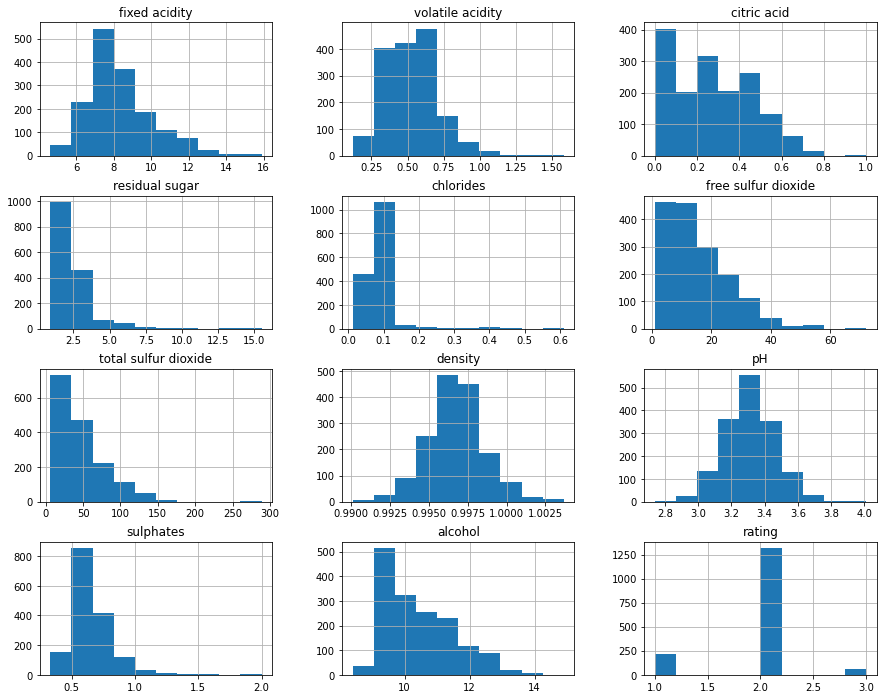

In [18]:
df.hist(bins=10,figsize=(15,12))
plt.show()

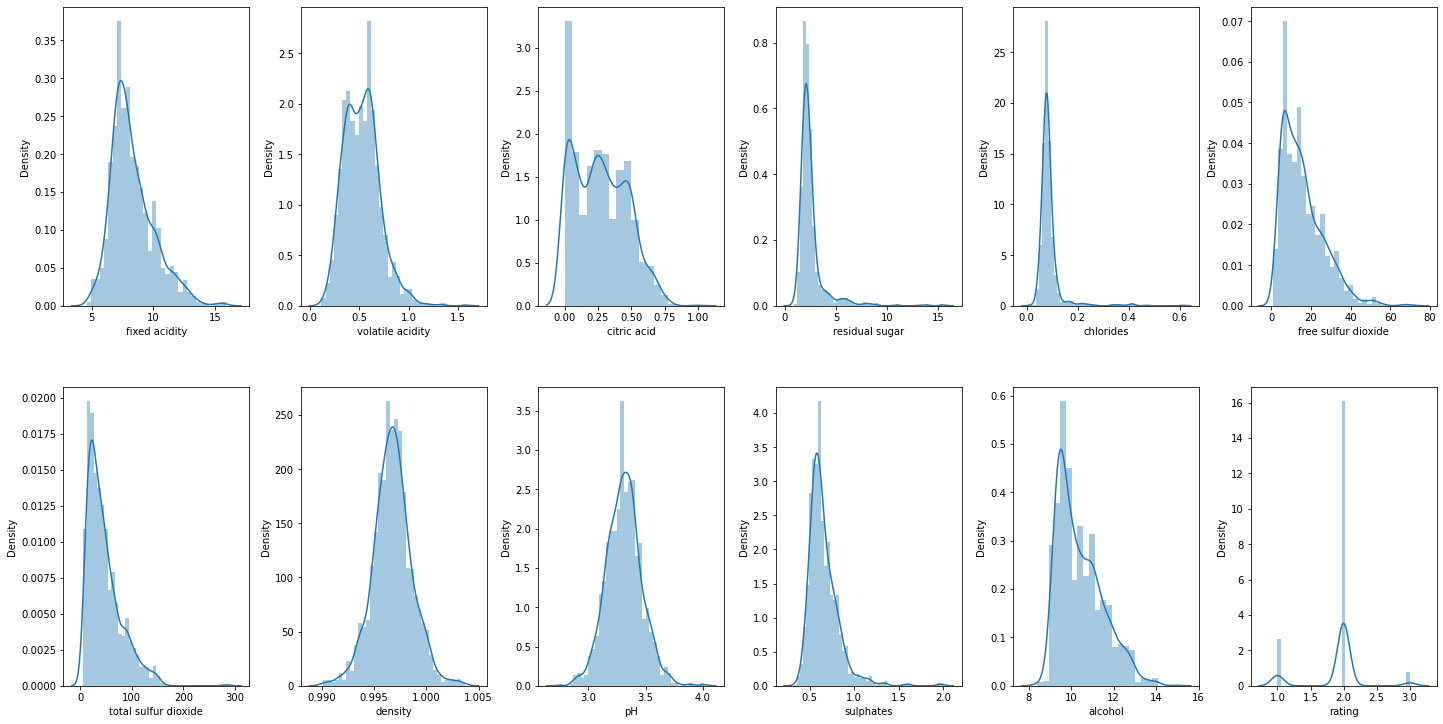

In [20]:
#ploting distplot
fig, ax=plt.subplots(ncols=6,nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sn.distplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

Majority of graphs showing normal distribution howeveralcohol and total sulfur dioxide is highly positive skewed.

there are huge outliers in variable residual sugar, chlorides, sulpahtes and total sulfur dioxide.

# Bivariate analysis

<AxesSubplot:xlabel='rating', ylabel='fixed acidity'>

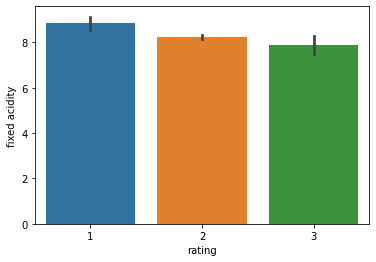

In [21]:
sn.barplot(x="rating", y="fixed acidity", data=df)

the plot above is of fixed acidity with rating variable. here rating is decrisng  with increase in fixed acidity

<AxesSubplot:xlabel='rating', ylabel='volatile acidity'>

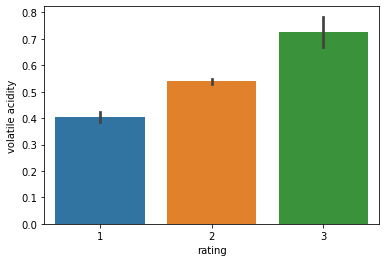

In [22]:
sn.barplot(x="rating", y="volatile acidity", data=df)

the plot above is of vilatie acidity with rating variable. here the graph is following positive trend. with the increse in volatile acidity rating is decressing

<AxesSubplot:xlabel='rating', ylabel='residual sugar'>

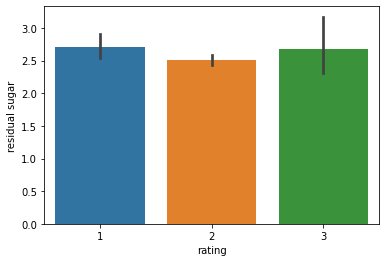

In [24]:
sn.barplot(x="rating", y="residual sugar", data=df)

the plot above is of residual sugar with rating variable. here it seems thses two variable are lossely correlated

<AxesSubplot:xlabel='rating', ylabel='citric acid'>

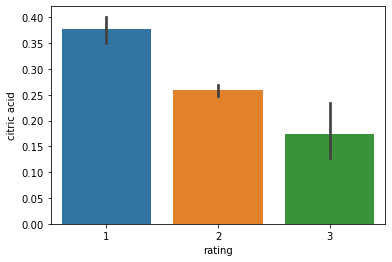

In [25]:
sn.barplot(x="rating", y="citric acid", data=df)

the plot above is of citric acid with rating variable. here rating is decrisng  with increase in fixed acidity

<AxesSubplot:xlabel='rating', ylabel='chlorides'>

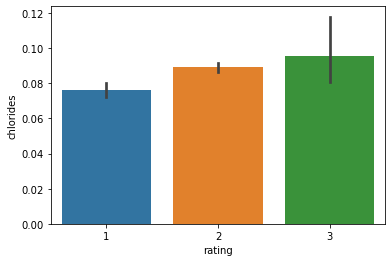

In [26]:
sn.barplot(x="rating", y="chlorides", data=df)

the plot above is of chlorides with rating variable. here the graph is following positive trend. with the increase in chlorides rating is decreasing.

<AxesSubplot:xlabel='rating', ylabel='free sulfur dioxide'>

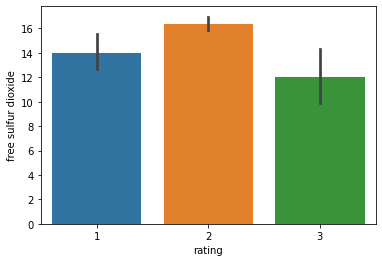

In [27]:
sn.barplot(x="rating", y="free sulfur dioxide", data=df)

the plot above is of free sulfur dioxide with rating variable. here with the increase of free sulfur dioxide the 2nd rating wine is is increasing

<AxesSubplot:xlabel='rating', ylabel='total sulfur dioxide'>

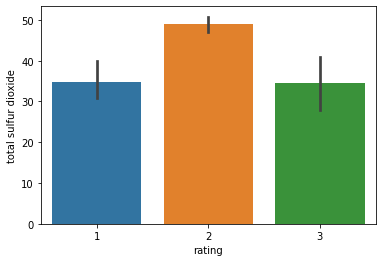

In [28]:
sn.barplot(x="rating", y="total sulfur dioxide", data=df)

the plot above is of total sulfur dioxide with rating variable. here with the increase of total sulfur dioxide the 2nd rating wine is is increasing

<AxesSubplot:xlabel='rating', ylabel='density'>

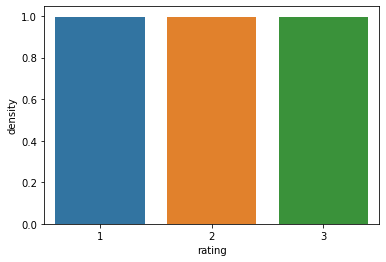

In [29]:
sn.barplot(x="rating", y="density", data=df)

the plot above is of density with rating variable. these variables are loosely correlated

<AxesSubplot:xlabel='rating', ylabel='pH'>

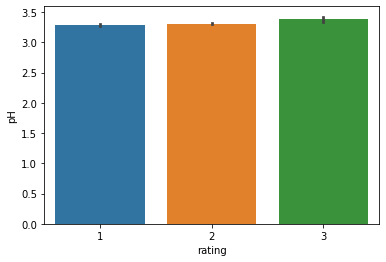

In [30]:
sn.barplot(x="rating", y="pH", data=df)

the plot above is of ph with rating variable. these variables are loosely correlated

<AxesSubplot:xlabel='rating', ylabel='alcohol'>

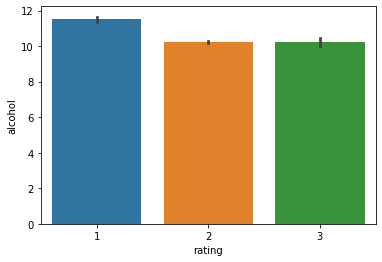

In [31]:
sn.barplot(x="rating", y="alcohol", data=df)

the plot above is of alcohol with rating variable. here the graph if following negative trend. with the increse in alcohol rating is decrising

<AxesSubplot:xlabel='rating', ylabel='sulphates'>

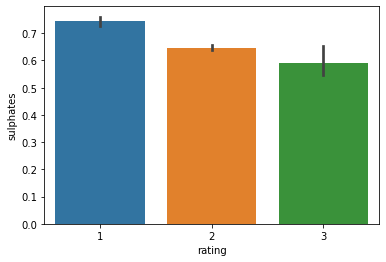

In [32]:
sn.barplot(x="rating", y="sulphates", data=df)

the plot above is of sulpahte with rating variable. here the graph if following negative trend. with the increse in sulphate rating is decressing

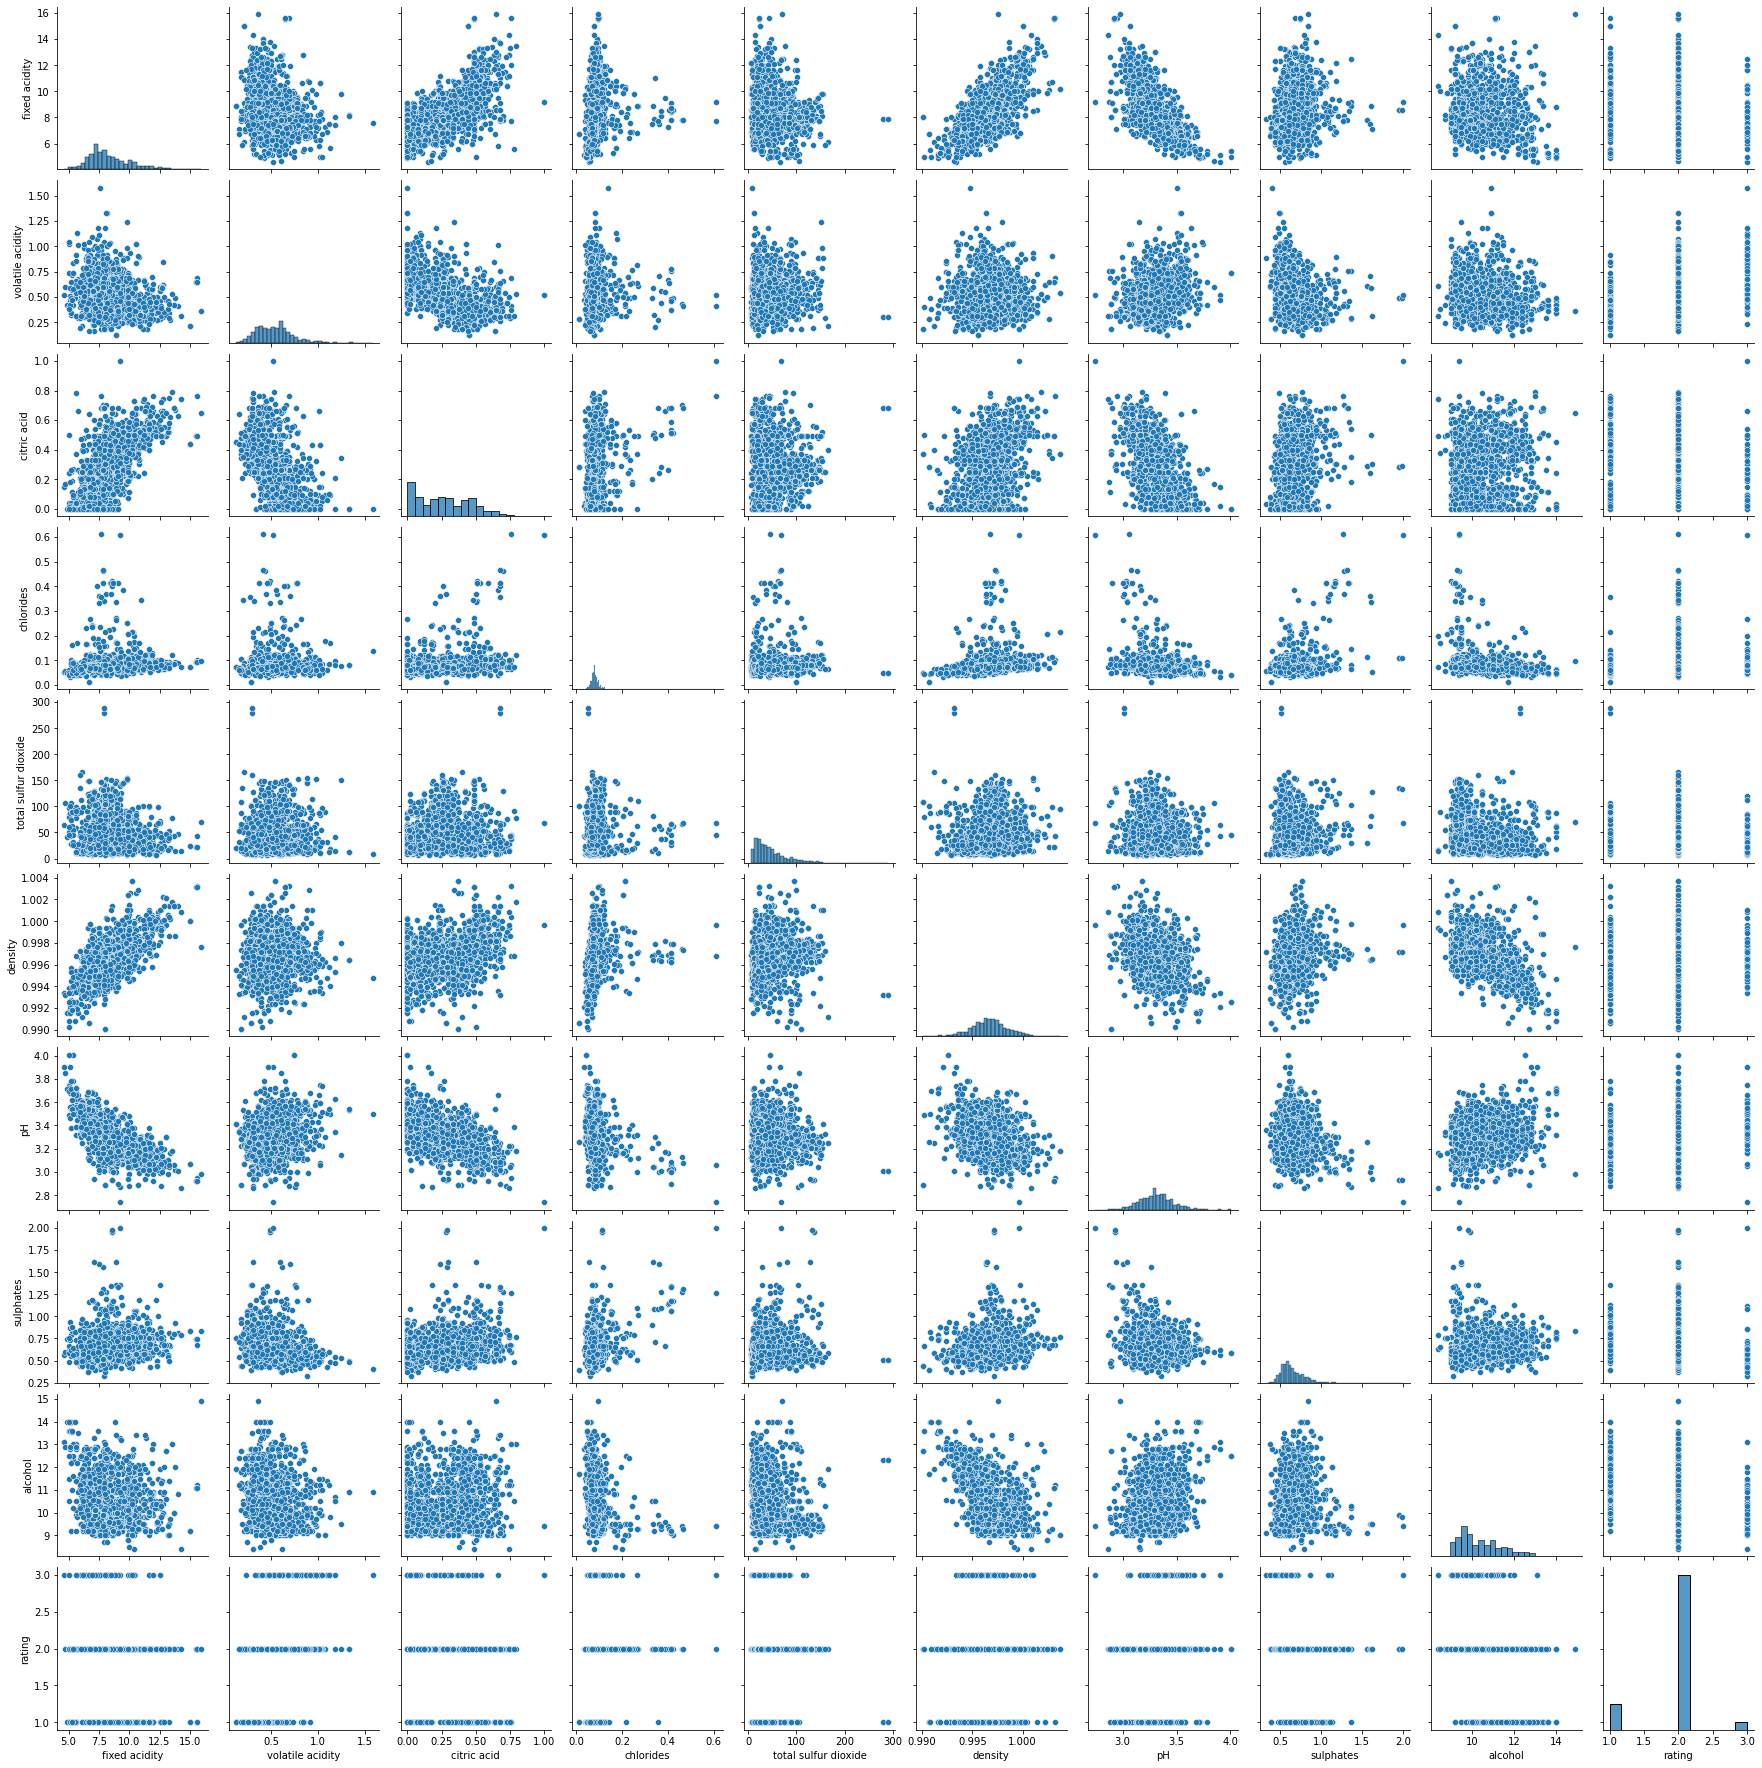

In [43]:
sn.pairplot(df)

# Coorelation

In [34]:
cor=df.corr()

<AxesSubplot:>

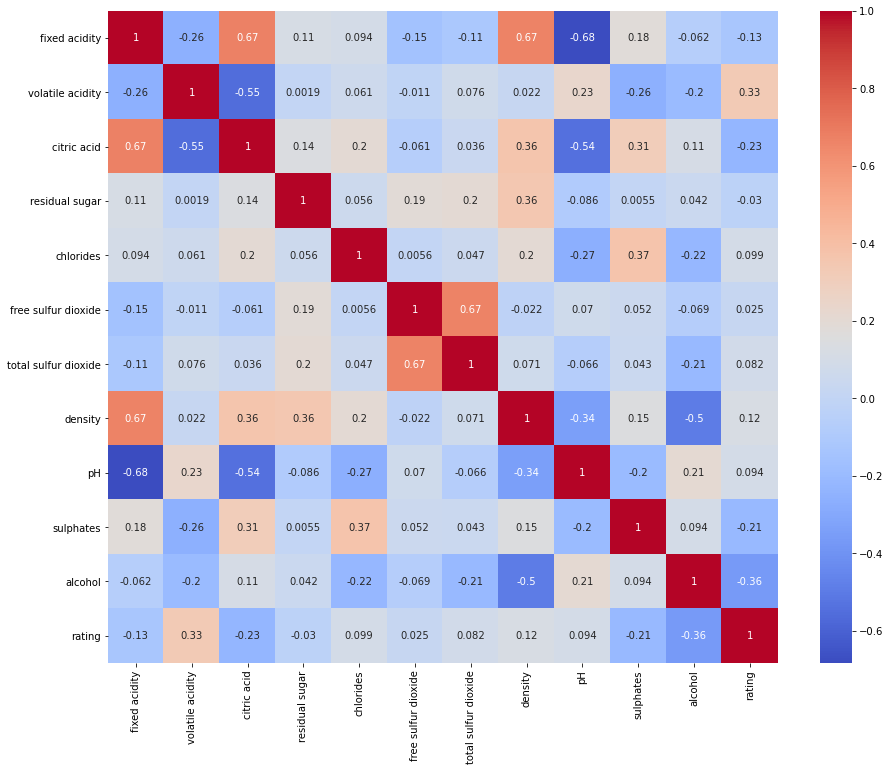

In [36]:
#using heatmap to show correlation
plt.figure(figsize=(15,12))
sn.heatmap(cor, annot=True, cmap="coolwarm")

alcohol, sulphates,residual sugar,citric acid and fixed acidity is negatively correlates with rating , all other variables  is postively correlated correlated
free sulfur dioxide, residual sugar are very less correlated with rating.

In [41]:
#droping less correlated values
df.drop(["free sulfur dioxide", "residual sugar"],axis=1, inplace=True)

# Identifying Outliers

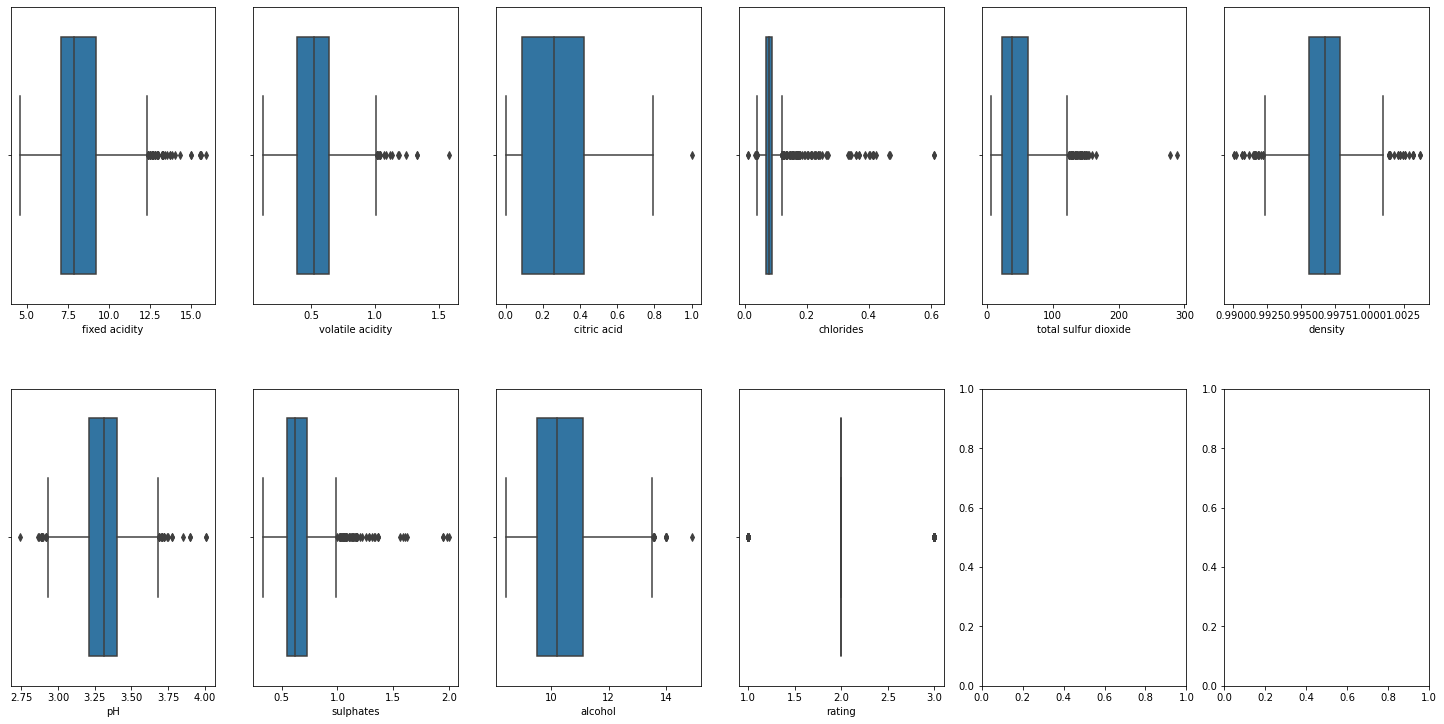

In [45]:
fig, ax=plt.subplots(ncols=6,nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sn.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

there are outliers in every columns.

# Removing Outlier

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [47]:
df_new=df[(z<3).all(axis=1)]

In [48]:
df_new.shape ,df.shape

((1491, 10), (1599, 10))

# Skewness

In [49]:
#checking for skewnwss
df_new.skew()

fixed acidity           0.826471
volatile acidity        0.373826
citric acid             0.304587
chlorides               2.280811
total sulfur dioxide    1.142456
density                 0.062412
pH                      0.112774
sulphates               0.883909
alcohol                 0.760180
rating                 -0.753270
dtype: float64

# Splitting the data into input and target

In [50]:
#spliting the value in x and y to apply power transform
x=df_new.drop("rating", axis=1)

In [51]:
y=df_new["rating"]

In [52]:
x.shape, y.shape

((1491, 9), (1491,))

In [53]:
y=y.values.reshape(-1,1)

In [54]:
y.shape

(1491, 1)

In [55]:
#applying power transform
from sklearn.preprocessing import power_transform

In [56]:
df1=power_transform(x)

In [57]:
df1=pd.DataFrame(df1, columns=x.columns)

In [58]:
df1.skew()

fixed acidity           0.020185
volatile acidity        0.004693
citric acid             0.020065
chlorides              -0.111268
total sulfur dioxide   -0.007906
density                -0.000968
pH                     -0.000057
sulphates               0.023161
alcohol                 0.110788
dtype: float64

In [59]:
x=df1

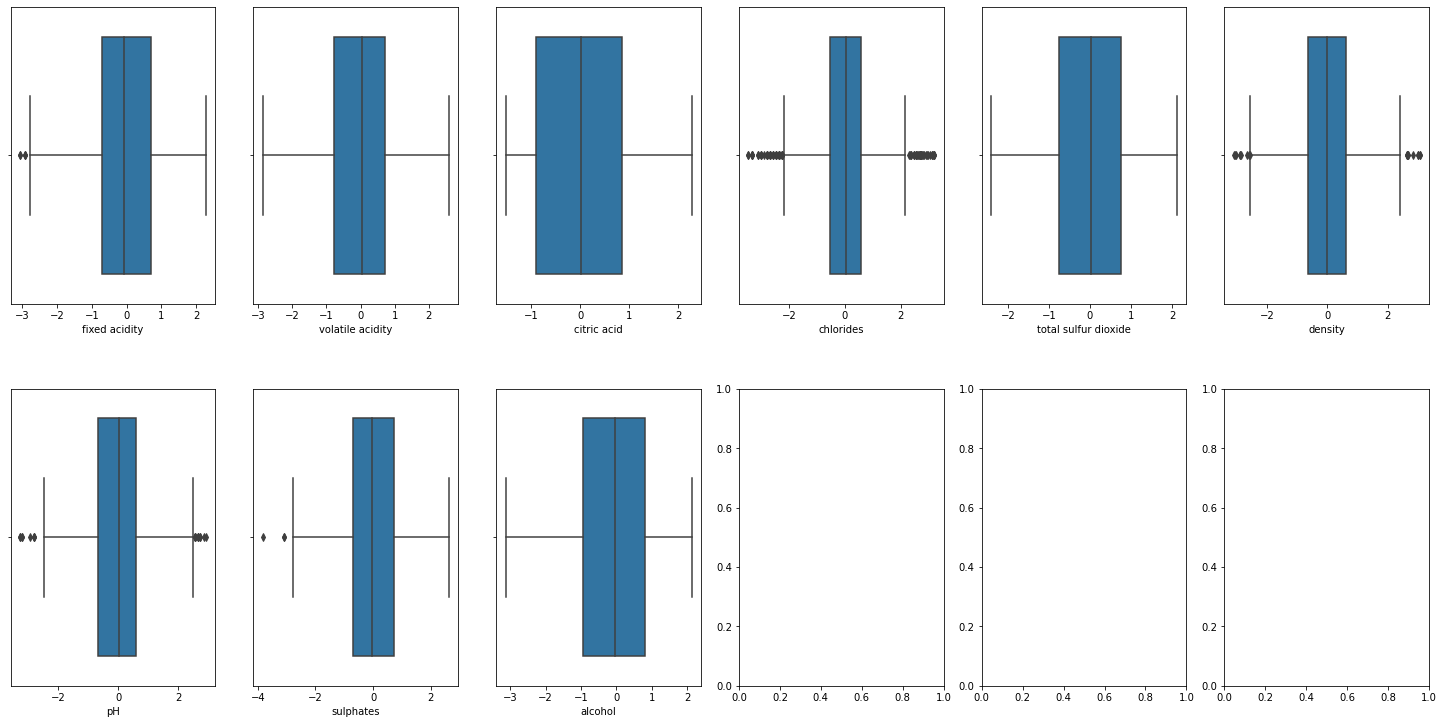

In [60]:
fig, ax=plt.subplots(ncols=6,nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in x.items():
    if col != "type":
        sn.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

Alot of outliers has been fixed. also the outliers present is in range

In [64]:
#as we have seen the dependent variable is highly imbalanced
#applying upscaling technique
from imblearn.over_sampling import SMOTE

In [65]:
oversample=SMOTE()
#data transformation
x,y = oversample.fit_resample(x,y)

<AxesSubplot:ylabel='count'>

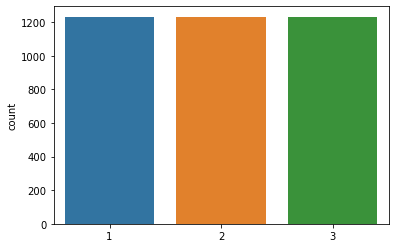

In [66]:
sn.countplot(y)

the data is evenly balance now.

# Importing libraries

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import GridSearchCV

In [69]:
#spliting the data in train test model 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=56)

In [70]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2587, 9), (1109, 9), (2587,), (1109,))

In [72]:
#creating function for the model and accuricy prediction
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""The classification report is:
    """,classification_report(y_test, predict))
       
    print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
    print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))

In [73]:
#DecisionTreeClassifier
model(DecisionTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           1       0.88      0.88      0.88       374
           2       0.81      0.80      0.81       375
           3       0.89      0.91      0.90       360

    accuracy                           0.86      1109
   macro avg       0.86      0.86      0.86      1109
weighted avg       0.86      0.86      0.86      1109

The accuracy score is:  0.8629395852119026
The confusion matrix is:
    
     [[329  43   2]
 [ 38 300  37]
 [  6  26 328]]


In [74]:
#SVC
model(SVC)

The classification report is:
                   precision    recall  f1-score   support

           1       0.86      0.93      0.89       374
           2       0.90      0.73      0.80       375
           3       0.87      0.96      0.92       360

    accuracy                           0.87      1109
   macro avg       0.88      0.88      0.87      1109
weighted avg       0.88      0.87      0.87      1109

The accuracy score is:  0.8737601442741209
The confusion matrix is:
    
     [[349  19   6]
 [ 57 273  45]
 [  0  13 347]]


In [75]:
#RandomForestClassifier
model(RandomForestClassifier)

The classification report is:
                   precision    recall  f1-score   support

           1       0.93      0.98      0.95       374
           2       0.96      0.88      0.92       375
           3       0.95      0.98      0.96       360

    accuracy                           0.95      1109
   macro avg       0.95      0.95      0.95      1109
weighted avg       0.95      0.95      0.95      1109

The accuracy score is:  0.9458972046889089
The confusion matrix is:
    
     [[368   5   1]
 [ 29 329  17]
 [  0   8 352]]


In [76]:
#KNeighborsClassifier
model(KNeighborsClassifier)

The classification report is:
                   precision    recall  f1-score   support

           1       0.84      0.99      0.91       374
           2       0.98      0.67      0.79       375
           3       0.87      0.99      0.93       360

    accuracy                           0.88      1109
   macro avg       0.89      0.88      0.88      1109
weighted avg       0.89      0.88      0.87      1109

The accuracy score is:  0.8809738503155996
The confusion matrix is:
    
     [[369   5   0]
 [ 71 250  54]
 [  1   1 358]]


In [77]:
#Naive Bayes
model(GaussianNB)

The classification report is:
                   precision    recall  f1-score   support

           1       0.79      0.82      0.81       374
           2       0.59      0.47      0.53       375
           3       0.64      0.75      0.69       360

    accuracy                           0.68      1109
   macro avg       0.68      0.68      0.67      1109
weighted avg       0.68      0.68      0.67      1109

The accuracy score is:  0.6807935076645627
The confusion matrix is:
    
     [[307  34  33]
 [ 79 178 118]
 [  2  88 270]]


# Using cross validation on all the model.

In [78]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean())

0.8457802728303404


In [79]:
print(cross_val_score(SVC(),x,y,cv=5).mean())

0.8344066122956516


In [80]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=5).mean())

0.9153048312182277


In [81]:
print(cross_val_score(KNeighborsClassifier(),x,y,cv=5).mean())

0.8441465823062575


In [82]:
print(cross_val_score(GaussianNB(),x,y,cv=5).mean())

0.6479881505321289


# The best model is RandomTreeClassifier.

# Parameter for Hypertuning

In [83]:
parameter={"max_depth":np.arange(2,10),
          "criterion":["gini","entropy"],
           }

In [85]:
#using GridSearchCV for Hyper parameter tuning
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [86]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [87]:
#checking best parameters
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [88]:
#building final model
best_model=RandomForestClassifier(criterion="entropy", max_depth=9)

In [89]:
best_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9)

In [90]:
pred=best_model.predict(x_test)
print("The accuracy score is: ", accuracy_score(y_test,pred))

The accuracy score is:  0.9161406672678089


# Saving the Model

In [91]:
import joblib
joblib.dump(best_model,"Wine_quality.pkl")

['Wine_quality.pkl']